In [1]:
import pandas as pd
import jieba
import stylecloud

from IPython.display import Image 

In [2]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/nika/Downloads/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['秦昊', '张东升', '王景春', '陈冠声', '荣梓杉',
                '朱朝阳', '史彭元', '严良', '王圣迪', '普普',
                '岳普', '张颂文', '朱永平', '十二集', '十二万',
                '十二时辰']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['真的', '这部', '这是', '一种', '那种',
                    '哈哈哈']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

In [6]:
#绘制词云图
def get_cloud(df,name,kind,color):
    text_cut = get_cut_words(df.content[df.content.str.contains(name)])
    stylecloud.gen_stylecloud(text=' '.join(text_cut), 
                          collocations=False,
                          font_path='/Library/Fonts/Songti.ttc',
                          icon_name=kind,#图形选择
                          palette=color,#颜色选择
                          size=653,
                          output_name=name+'.png')
    return Image(filename=name+'.png')

In [7]:
def main():
    url=input('请输入文件地址：')
    df=pd.read_excel(url)
    df['content'] = df.contents.astype('str')
    name=input('请输入主角名字：')
    kind='fas fa-'+input('请输入图形形状：')
    color=input('请输入颜色：')
    get_cloud(df,name,kind,color)

    
if __name__ == '__main__':
    main()


请输入文件地址：/Users/nika/InnowWork/Innow/Python/jiaoluo.xlsx
请输入主角名字：严良
请输入图形形状：ship
请输入颜色：cmocean.sequential.Algae_17


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/5s/rpchc4zs34129kgh3lsj0g_h0000gn/T/jieba.cache
Loading model cost 0.694 seconds.
Prefix dict has been built successfully.


In [29]:
url=input('请输入文件地址：')
df=pd.read_excel(url)
df['content'] = df.contents.astype('str')
name=input('请输入主角名字：')
kind='fas fa-'+input('请输入图形形状：')
color=input('请输入颜色：')

请输入文件地址：/Users/nika/InnowWork/Innow/Python/jiaoluo.xlsx
请输入主角名字：张东升
请输入图形形状：mountain
请输入颜色：cmocean.sequential.Algae_17


张东升 fas fa-mountain cmocean.sequential.Algae_17


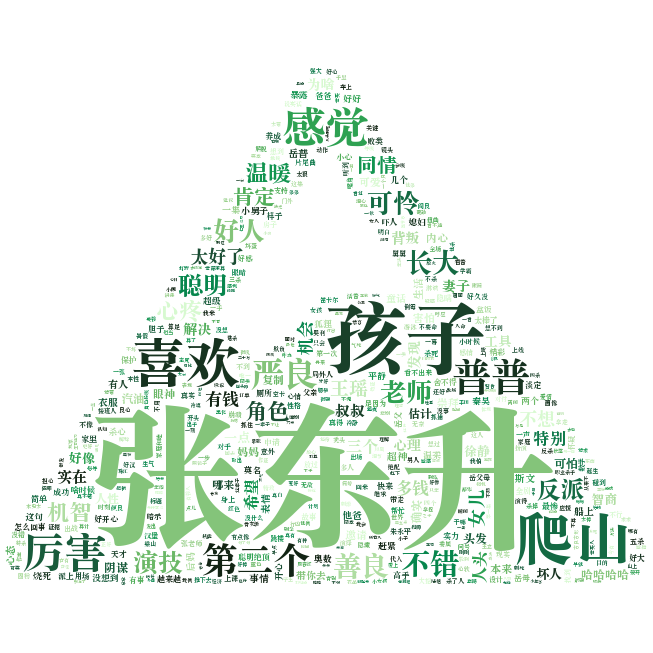

In [30]:
print(name,kind,color)
get_cloud(df,name,kind,color)